Получить формулы для градиента и гессиана функции логистической регрессии. Выписать их в отчет в матрично-векторной форме с использованием поэлементных функций, но без каких-либо суммирований. Также выписать в отчетвыражение для самой функции логистической регрессии в матрично-векторной форме (без явных суммирований).

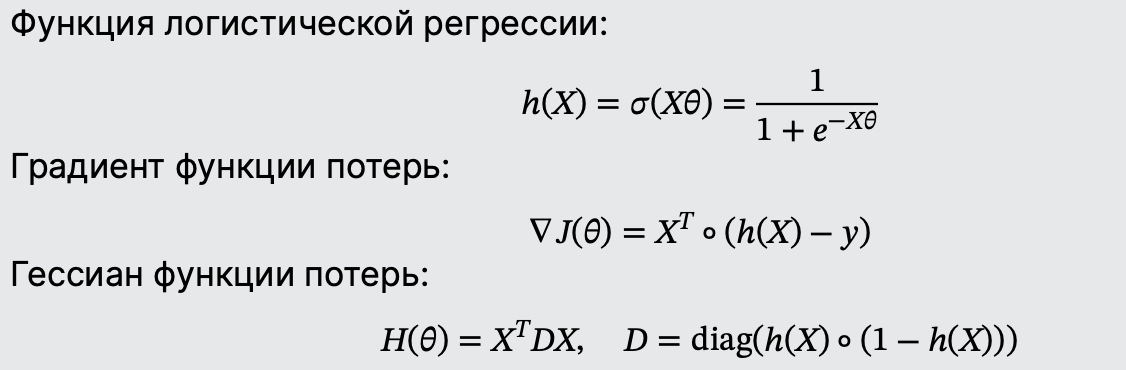

Проверить правильность реализации подсчета градиента и гессиана логистического оракула с помощью реализованных функций. Для этого сгенерируйте небольшую модельную выборку (матрицу 𝐴 и вектор 𝑏 ) и сравните значения, выдаваемые методами grad и hess, с соответствующими разностными аппроксимациями в нескольких пробных точках.

In [ ]:
import numpy as np

np.random.seed(0)
n_samples = 10
n_features = 5

A = np.random.randn(n_samples, n_features)
b = np.random.randint(0, 2, size=n_samples)  # Бинарная целевая переменная
regcoef = 0.1

# Создание оракула и тестирование разностных производных
oracle = create_log_reg_oracle(A, b, regcoef)

# Тестовая точка
x_test = np.random.randn(n_features)

# Вычисление градиента и Гессиана аналитически
grad_analytic = oracle.grad(x_test)
hess_analytic = oracle.hess(x_test)

# Вычисление градиента и Гессиана с помощью разностных производных
grad_numerical = grad_finite_diff(lambda x: oracle.f(x), x_test)
hess_numerical = hess_finite_diff(lambda x: oracle.f(x), x_test)

# Сравнение результатов
print("Аналитический градиент:\n", grad_analytic)
print("Численный градиент:\n", grad_numerical)
print("\nРазница (градиент):\n", grad_analytic - grad_numerical)

print("\nАналитический Гессиан:\n", hess_analytic)
print("Численный Гессиан:\n", hess_numerical)
print("\nРазница (Гессиан):\n", hess_analytic - hess_numerical)

# Нужно этот код вставить в код функций и все будет работать

# **ЭКСПЕРИМЕНТЫ**


**Эксперимент 1**

Траектория градиентного спуска на квадратичной функции

Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте две-три квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня функций и траекториями методов.
Попробуйте ответить на следующий вопрос:Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная стратегия, Армихо, Вульф)?

Сами функции:

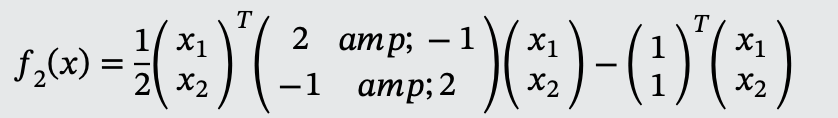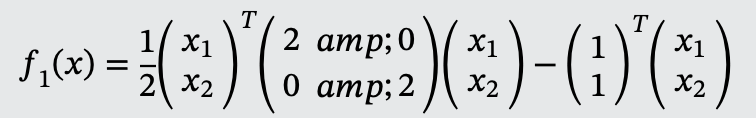

Именно они использовались для выполнения этого эксперимента

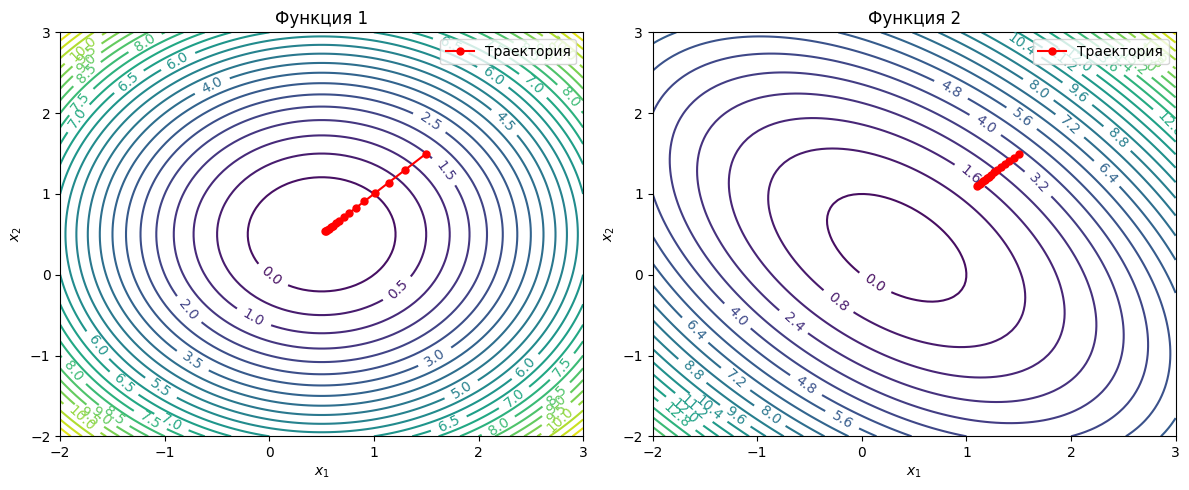

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class QuadraticOracle:
    def __init__(self, A, b):
        self.A = A
        self.b = b

    def f(self, x):
        return 0.5 * np.dot(x.T, np.dot(self.A, x)) - np.dot(self.b, x)

    def grad(self, x):
        return np.dot(self.A, x) - self.b

def gradient_descent(oracle, x0, learning_rate, num_iterations):
    x = x0.astype(np.float64)
    trajectory = [x.copy()]
    for _ in range(num_iterations):
        x -= learning_rate * oracle.grad(x)
        trajectory.append(x.copy())
    return np.array(trajectory)

# Задаем первую функцию
A1 = np.array([[2, 0], [0, 2]], dtype=np.float64)
b1 = np.array([1, 1], dtype=np.float64)
oracle1 = QuadraticOracle(A1, b1)

# Задаем вторую функцию
A2 = np.array([[2, -1], [-1, 2]], dtype=np.float64)
b2 = np.array([1, 1], dtype=np.float64)
oracle2 = QuadraticOracle(A2, b2)

# Начальное значение
x0 = np.array([1.5, 1.5], dtype=np.float64)  # Начальная точка
learning_rate = 0.1
num_iterations = 15

# Запуск градиентного спуска для первой функции
trajectory1 = gradient_descent(oracle1, x0, learning_rate, num_iterations)

# Запуск градиентного спуска для второй функции
trajectory2 = gradient_descent(oracle2, x0, learning_rate, num_iterations)

# Создаем сетку для первой функции
x_vals = np.linspace(-2, 3, 100)
y_vals = np.linspace(-2, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Вычисляем значение функции на сетке для первой функции
Z1 = 0.5 * (A1[0, 0] * X**2 + A1[1, 1] * Y**2) - (b1[0] * X + b1[1] * Y)

# Визуализация первой функции
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
contour1 = plt.contour(X, Y, Z1, levels=30, cmap='viridis')
plt.clabel(contour1)
plt.plot(trajectory1[:, 0], trajectory1[:, 1], marker='o', color='r', label='Траектория', markersize=5)
plt.title('Функция 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

# Создаем сетку для второй функции
Z2 = 0.5 * (A2[0, 0] * X**2 + A2[1, 1] * Y**2 - 2 * (A2[0, 1] * X * Y)) - (b2[0] * X + b2[1] * Y)

# Визуализация второй функции
plt.subplot(1, 2, 2)
contour2 = plt.contour(X, Y, Z2, levels=30, cmap='viridis')
plt.clabel(contour2)
plt.plot(trajectory2[:, 0], trajectory2[:, 1], marker='o', color='r', label='Траектория', markersize=5)
plt.title('Функция 2')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

plt.tight_layout()
plt.show()

1. Число обусловленности
Число обусловленности матрицы, определяющей функцию (в данном случае матрица
A
), играет ключевую роль. Оно определяет, насколько сильно функция может «изменяться» в разных направлениях:
Плохо обусловленная функция (высокое число обусловленности): градиентный спуск может сходиться медленно, так как шаги в направлениях с большими значениями функции могут быть слишком большими, в то время как в направлениях с меньшими значениями они могут быть слишком маленькими. Это может привести к зигзагообразному движению и трудностям в достижении минимума.
Хорошо обусловленная функция (низкое число обусловленности): метод будет сходиться быстрее, так как шаги будут более уравновешенными в разных направлениях. Градиентный спуск будет более стабильным и эффективным.
2. Выбор начальной точки
Начальная точка также значительно влияет на эффективность метода:
Близость к минимуму: Если начальная точка расположена близко к минимуму функции, метод будет сходиться быстрее. В случае хорошо обусловленных функций амплитуда и равноразмерность шагов помогают быстрее достигнуть минимума.
Далекое расстояние от минимума: Если точка начальная далеко от минимума, особенно для плохо обусловленных функций, метод может застрять или двигаться медленно, требуя больше итераций для достижения задания точности.
3. Стратегия выбора шага
Различные стратегии выбора шага (learning rate) могут значительно изменить процесс оптимизации:
Константная стратегия: Это простейший подход, при котором шаг остается фиксированным. Он работает хорошо на хорошо обусловленных функциях, но может быть вредным для плохо обусловленных функций, так как фиксированный шаг может быть слишком большим или слишком маленьким.
Стратегия Армихо: Метод Армихо представляет собой адаптивный подход, который находит подходящий размер шага, который удовлетворяет определённым условиям уменьшения. Это помогает обеспечить более устойчивую сходимость и избегать слишком больших шагов, что делает его особенно полезным для функций с высокими значениями чисел обусловленности.
Стратегия Вульфа: Метод Вульфа также адаптивен и включает более строгие критерии условия уменьшения. Он может предложить ещё более стабильную конвергенцию, особенно в случаях, когда функция имеет сложные ландшафты.

**Эксперимент 2**

Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от сле- дующих двух параметров: 1) числа обусловленности  κ≥1  оптимизируемой функции и 2) размерности пространства  𝑛  оптимизируемых переменных.
Для этого для заданных параметров n и κ сгенерируйте случайным образом квадратичную задачу размер аnс числом обусловленностиκи запустите на ней градиентный спуск с некоторой фиксированной требуемой точностью. Замерьте число итераций  𝑇(𝑛,κ) , которое потребовалось сделать методу до сходимости (успешному выходу по критерию остановки).

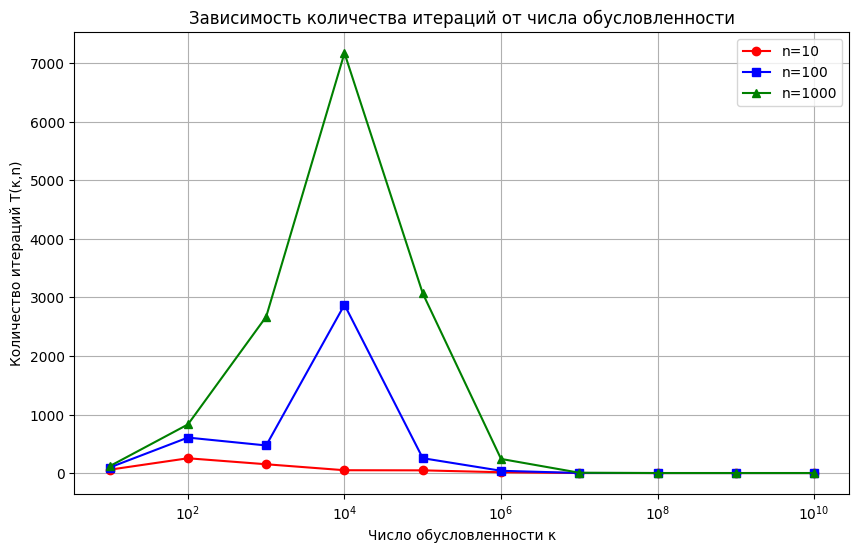

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

def generate_quadratic_problem(n, kappa):
    a = np.random.uniform(1, kappa, size=n)
    A = diags(a)  # Создаем разреженную диагональную матрицу
    b = np.random.randn(n)  # Генерируем случайный вектор b
    return A, b

def gradient_descent(A, b, x0, tol=1e-6, max_iter=10000):
    x = x0
    T = 0
    for _ in range(max_iter):
        grad = A.dot(x) - b  # Вычисляем градиент
        step_size = 1 / np.max(np.diag(A.toarray()))  # Шаг для градиентного спуска
        x_new = x - step_size * grad
        T += 1
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return T

def run_experiment(n_values, kappa_values, num_trials=5):
    results = {n: [] for n in n_values}

    for kappa in kappa_values:
        for n in n_values:
            iterations = []
            for _ in range(num_trials):
                A, b = generate_quadratic_problem(n, kappa)
                x0 = np.zeros(n)  # Начальная точка
                T = gradient_descent(A, b, x0)
                iterations.append(T)
            avg_iterations = np.mean(iterations)
            results[n].append(avg_iterations)

    return results

# Параметры эксперимента
n_values = [10, 100, 1000]  # Размерности
kappa_values = np.logspace(1, 10, num=10)  # Числа обусловленности от 1 до 10^10

# Запуск эксперимента
results = run_experiment(n_values, kappa_values)

# Построение графиков
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']  # Разные маркеры для разных n

for i, n in enumerate(n_values):
    plt.plot(kappa_values, results[n], marker=markers[i], color=colors[i], label=f'n={n}')

plt.xscale('log')
plt.xlabel('Число обусловленности κ')
plt.ylabel('Количество итераций T(κ,n)')
plt.title('Зависимость количества итераций от числа обусловленности')
plt.legend()
plt.grid()
plt.show()

можно сделать следующие выводы:

1. Возрастание числа обусловленности: Обычно с увеличением числа обусловленности κ количество итераций T также возрастает. Это связано с тем, что задачи с высокой обусловленностью требуют больше шагов для достижения сходимости, так как они более чувствительны к изменениям в начальных условиях и к численным ошибкам.

2. Влияние размерности: Как правило, при фиксированном κ количество итераций увеличивается с увеличением размерности n. Это может быть связано с тем, что в задачах с более высокими размерностями сложность оптимизации возрастает, и требуется больше итераций для нахождения оптимального решения.

3. Линейный рост: Если график показывает линейный или почти линейный рост числа итераций относительно κ, это может указывать на то, что алгоритм градиентного спуска работает эффективно для данной задачи, хотя и требует больше времени при высоких значениях κ.

4. Сравнение между размерностями: Можно заметить, что для меньших размерностей (например, n = 10) количество итераций может расти медленнее по сравнению с большими размерностями (например, n = 1000). Это может указывать на то, что для малых задач алгоритм быстрее находит оптимальное решение.

5. Сложность алгоритма: Если увеличение n значительно увеличивает количество итераций, это может указывать на то, что выбранный алгоритм (градиентный спуск) не является оптимальным для задач высокой размерности или высокой обусловленности.

6. Практическое применение: Эти выводы могут помочь в выборе методов оптимизации для конкретных задач. Например, если задача имеет высокую обусловленность и большую размерность, может быть целесообразно рассмотреть более сложные методы оптимизации (например, методы второго порядка или адаптивные методы).



In [11]:
pip install numpy scipy matplotlib scikit-learn

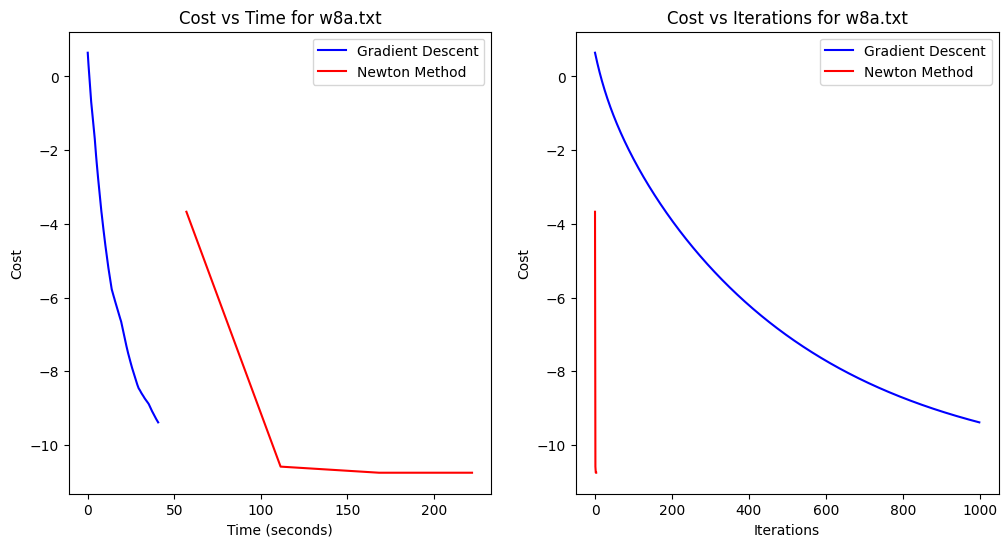

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
import time

# Функция для вычисления сигмоидальной функции
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функция для затрат логистической регрессии с L2-регуляризацией
def logistic_regression_cost(X, y, w, lambd):
    m = X.shape[0]
    h = sigmoid(X.dot(w))
    cost = - (1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h))) + (lambd / 2) * np.sum(np.square(w))
    return cost

# Градиентный спуск
def gradient_descent(X, y, alpha=0.01, lambd=0.1, max_iter=1000):
    m, n = X.shape
    w = np.zeros(n)
    costs = []
    times = []
    start_time = time.time()

    for _ in range(max_iter):
        gradient = (1/m) * X.T.dot(sigmoid(X.dot(w)) - y) + lambd * w
        w -= alpha * gradient

        current_time = time.time() - start_time
        costs.append(logistic_regression_cost(X, y, w, lambd))
        times.append(current_time)

    return w, costs, times

# Метод Ньютона
def newton_method(X, y, lambd=0.1, max_iter=1000):
    m, n = X.shape
    w = np.zeros(n)
    costs = []
    times = []
    start_time = time.time()

    for _ in range(max_iter):
        h = sigmoid(X.dot(w))
        gradient = (1 / m) * X.T.dot(h - y) + lambd * w
        H = (1 / m) * (X.T.dot(np.diag(h * (1 - h))).dot(X)) + lambd * np.eye(n)

        w -= np.linalg.inv(H).dot(gradient)

        if np.linalg.norm(gradient) < 1e-6:
          break

        current_time = time.time() - start_time
        costs.append(logistic_regression_cost(X, y, w, lambd))
        times.append(current_time)

    return w, costs, times


# Функция для загрузки данных из файлов
def load_data(filename):
    data = load_svmlight_file(filename)
    X = data[0].toarray()
    y = data[1]
    return X, y

# Основная функция для выполнения обучения и визуализации
def main():
    filenames = ['w8a.txt', 'real-sim.txt']

    for filename in filenames:
        X, y = load_data(filename)

        # Добавляем столбец единиц для смещения
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Градиентный спуск
        w_gd, costs_gd, times_gd = gradient_descent(X, y)

        # Метод Ньютона
        w_nm, costs_nm, times_nm = newton_method(X, y)

        # Визуализация
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(times_gd, costs_gd, label='Gradient Descent', color='blue')
        plt.plot(times_nm, costs_nm, label='Newton Method', color='red')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Cost')
        plt.title(f'Cost vs Time for {filename}')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(len(costs_gd)), costs_gd, label='Gradient Descent', color='blue')
        plt.plot(range(len(costs_nm)), costs_nm, label='Newton Method', color='red')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title(f'Cost vs Iterations for {filename}')
        plt.legend()

        plt.show()

if __name__ == '__main__':
    main()

Очень большое количество данных, что гугл коллаб не справляется с ними, поэтому нет всех графиков.